# 양돈 모돈 데이터 파일 전처리 및 시각화

## 2021년 기준 양돈 모돈 데이터 전처리

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 데이터 불러오기
file_path = "../data/2021 양돈 모돈 데이터.csv"
df = pd.read_csv(file_path)

In [2]:
# 날짜 변환
df['분만일'] = pd.to_datetime(df['분만일'], format='%Y%m%d', errors='coerce')

# 연도, 월, 계절 컬럼 추가
df['연도'] = df['분만일'].dt.year
df['월'] = df['분만일'].dt.month

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28908 entries, 0 to 28907
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   농장아이디      28908 non-null  object        
 1   개체 구별 번호   28908 non-null  int64         
 2   산차         28908 non-null  int64         
 3   교배지수       28908 non-null  int64         
 4   경과일        28908 non-null  int64         
 5   교배일        28908 non-null  int64         
 6   임신 사고기간    2 non-null      float64       
 7   임신 사고 원인   2 non-null      object        
 8   임신 기간      28908 non-null  int64         
 9   분만일        28908 non-null  datetime64[ns]
 10  총산자수       28908 non-null  int64         
 11  미라         28908 non-null  int64         
 12  사산         28908 non-null  int64         
 13  실산자수       28908 non-null  int64         
 14  생시도태두수     650 non-null    float64       
 15  양자전입두수     650 non-null    float64       
 16  양자전출두수     650 non-null    float64      

In [4]:
df

,농장아이디,개체 구별 번호,산차,교배지수,경과일,교배일,임신 사고기간,임신 사고 원인,임신 기간,분만일,...,생시도태두수,양자전입두수,양자전출두수,포유자돈폐사 두수,부분이유 두수,포유기간,이유일,이유두수,연도,월
0,PF_0020069,310,13,1,58,20200926,NaN,NaN,115,2021-01-19,...,2.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,2021,1
1,PF_0020199,11,1,2,0,20201027,NaN,NaN,118,2021-02-22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,2
2,PF_0020199,12,1,1,5,20200915,NaN,NaN,145,2021-02-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,2
3,PF_0020199,13,1,1,5,20200924,NaN,NaN,135,2021-02-06,...,NaN,NaN,NaN,NaN,NaN,0.0,20210206.0,9.0,2021,2
4,PF_0020199,14,1,1,5,20201022,NaN,NaN,115,2021-02-14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28903,PF_0023203,65,1,1,0,20210808,NaN,NaN,115,2021-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,12
28904,PF_0023203,66,1,1,0,20210808,NaN,NaN,115,2021-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,12
28905,PF_0023203,68,1,1,0,20210808,NaN,NaN,115,2021-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,12
28906,PF_0023203,77,1,1,0,20210808,NaN,NaN,115,2021-12-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,12


In [5]:
df = df[df['실산자수']>=df['이유두수']]
df = df[df['이유두수'] > 0]

In [6]:
# '실산자수', '이유두수' 결측 제거
df_filtered = df.dropna(subset=['실산자수', '이유두수'])

In [7]:
# 계절 매핑
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

df['계절'] = df['월'].apply(get_season)

In [8]:
df

,농장아이디,개체 구별 번호,산차,교배지수,경과일,교배일,임신 사고기간,임신 사고 원인,임신 기간,분만일,...,양자전입두수,양자전출두수,포유자돈폐사 두수,부분이유 두수,포유기간,이유일,이유두수,연도,월,계절
7,PF_0020199,74,4,1,5,20200826,NaN,NaN,135,2021-01-08,...,NaN,NaN,NaN,NaN,29.0,20210206.0,10.0,2021,1,겨울
12,PF_0020199,121,3,1,5,20200915,NaN,NaN,118,2021-01-11,...,NaN,NaN,NaN,NaN,26.0,20210206.0,10.0,2021,1,겨울
13,PF_0020199,122,3,1,5,20200915,NaN,NaN,115,2021-01-08,...,NaN,NaN,NaN,NaN,29.0,20210206.0,9.0,2021,1,겨울
15,PF_0020199,125,3,1,5,20200919,NaN,NaN,118,2021-01-15,...,NaN,NaN,NaN,NaN,27.0,20210211.0,9.0,2021,1,겨울
20,PF_0020199,165,2,1,5,20200910,NaN,NaN,120,2021-01-08,...,NaN,NaN,NaN,NaN,29.0,20210206.0,10.0,2021,1,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28892,PF_0023007,1610,1,1,0,20210515,NaN,NaN,115,2021-09-07,...,NaN,NaN,NaN,NaN,25.0,20211002.0,12.0,2021,9,가을
28893,PF_0023030,281,1,1,0,20210329,NaN,NaN,115,2021-07-22,...,NaN,NaN,NaN,NaN,20.0,20210811.0,12.0,2021,7,여름
28895,PF_0023203,11,1,1,0,20210704,NaN,NaN,115,2021-10-27,...,NaN,NaN,NaN,NaN,21.0,20211117.0,10.0,2021,10,가을
28898,PF_0023203,23,1,1,0,20210710,NaN,NaN,116,2021-11-03,...,NaN,NaN,NaN,NaN,21.0,20211124.0,14.0,2021,11,가을


In [9]:
# 분석 대상 컬럼 중 일부 NaN 제거
df_filtered = df.dropna(subset=['실산자수', '이유두수'])

# 주차 정보 추가 (연도-주차 조합 문자열로 생성)
df_filtered['주차'] = df_filtered['분만일'].dt.to_period('W').apply(lambda r: r.start_time)

# 주 단위 평균 계산
weekly_avg = df_filtered.groupby('주차')[['실산자수', '이유두수']].mean().reset_index()

# 산차별 실산자수/이유두수 평균
by_parity = df_filtered.groupby('산차')[['실산자수', '이유두수']].mean().reset_index()

# 월별 실산자수/이유두수 평균
by_month = df_filtered.groupby('월')[['실산자수', '이유두수']].mean().reset_index()

# 계절별 실산자수/이유두수 평균
by_season = df_filtered.groupby('계절')[['실산자수', '이유두수']].mean().reset_index()

# 계절 순서 재정렬: 봄 → 여름 → 가을 → 겨울
season_order = ['겨울', '봄', '여름', '가을']
by_season_sorted = by_season.set_index('계절').loc[season_order].reset_index()

# 일자별 평균 실산자수 및 이유두수 계산
daily_avg = df_filtered.groupby('분만일')[['실산자수', '이유두수']].mean().reset_index()

In [10]:
daily_avg

,분만일,실산자수,이유두수
0,2021-01-01,12.753623,10.681159
1,2021-01-02,13.478261,10.673913
2,2021-01-03,13.459459,10.459459
3,2021-01-04,13.487805,10.804878
4,2021-01-05,13.214286,10.250000
...,...,...,...
360,2021-12-27,13.733333,11.100000
361,2021-12-28,13.506849,10.547945
362,2021-12-29,14.000000,11.171875
363,2021-12-30,13.362637,11.450549


In [18]:
def plot_grouped_data(df, x, y_list, title):
    for y in y_list:
        plt.plot(df[x], df[y], marker='.', label=y)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel('두수')
    plt.legend()
    plt.grid(True)
    plt.savefig('plot_image2.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

## Line graph

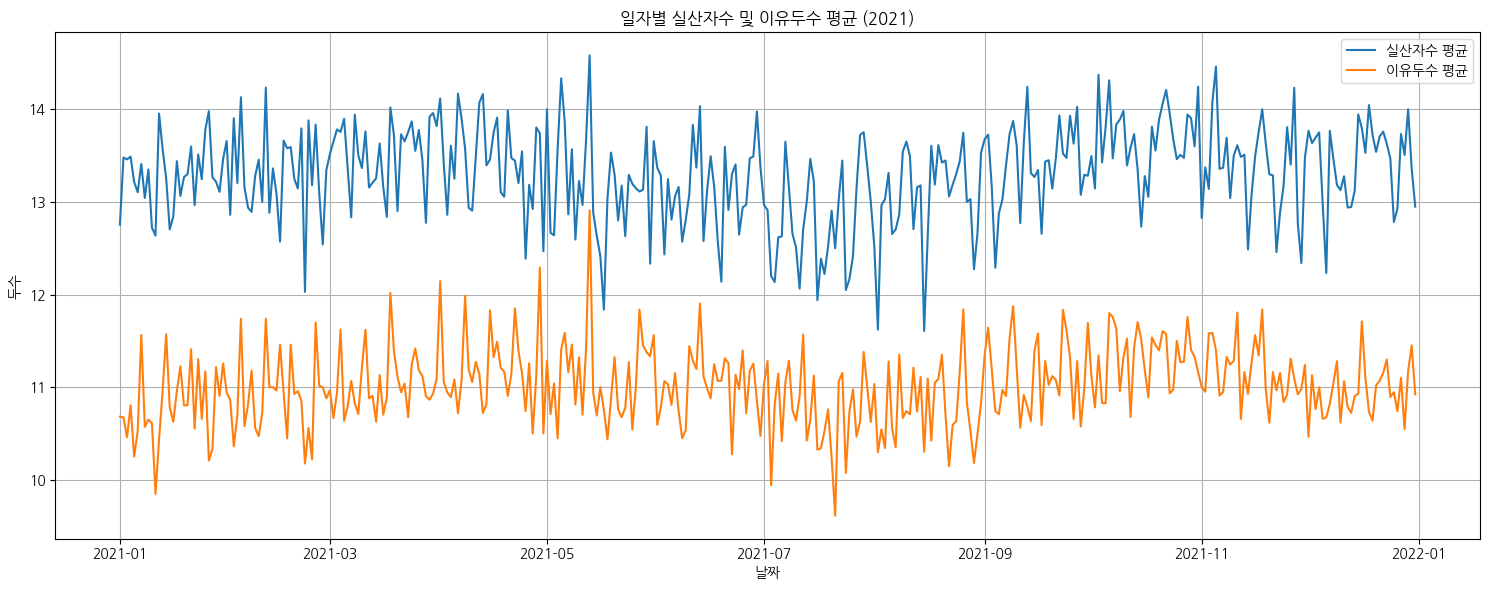

In [12]:
# 시각화
plt.figure(figsize=(15, 6))
plt.plot(daily_avg['분만일'], daily_avg['실산자수'], label='실산자수 평균')
plt.plot(daily_avg['분만일'], daily_avg['이유두수'], label='이유두수 평균')
plt.title('일자별 실산자수 및 이유두수 평균 (2021)')
plt.xlabel('날짜')
plt.ylabel('두수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('plot_image.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### season line(Rough Graph)

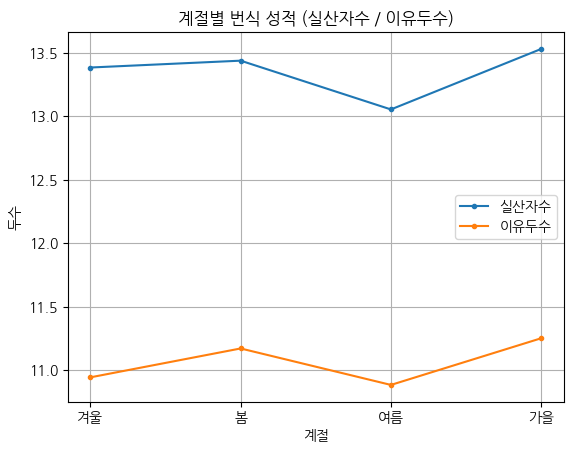

In [17]:
plot_grouped_data(by_season_sorted, '계절', ['실산자수', '이유두수'], '계절별 번식 성적 (실산자수 / 이유두수)')

### Reproductive Performance By Parity

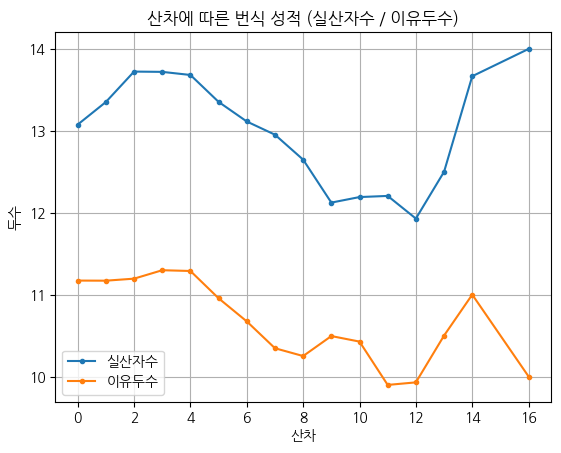

In [19]:
# 시각화 출력
plot_grouped_data(by_parity, '산차', ['실산자수', '이유두수'], '산차에 따른 번식 성적 (실산자수 / 이유두수)')

## Bar graph

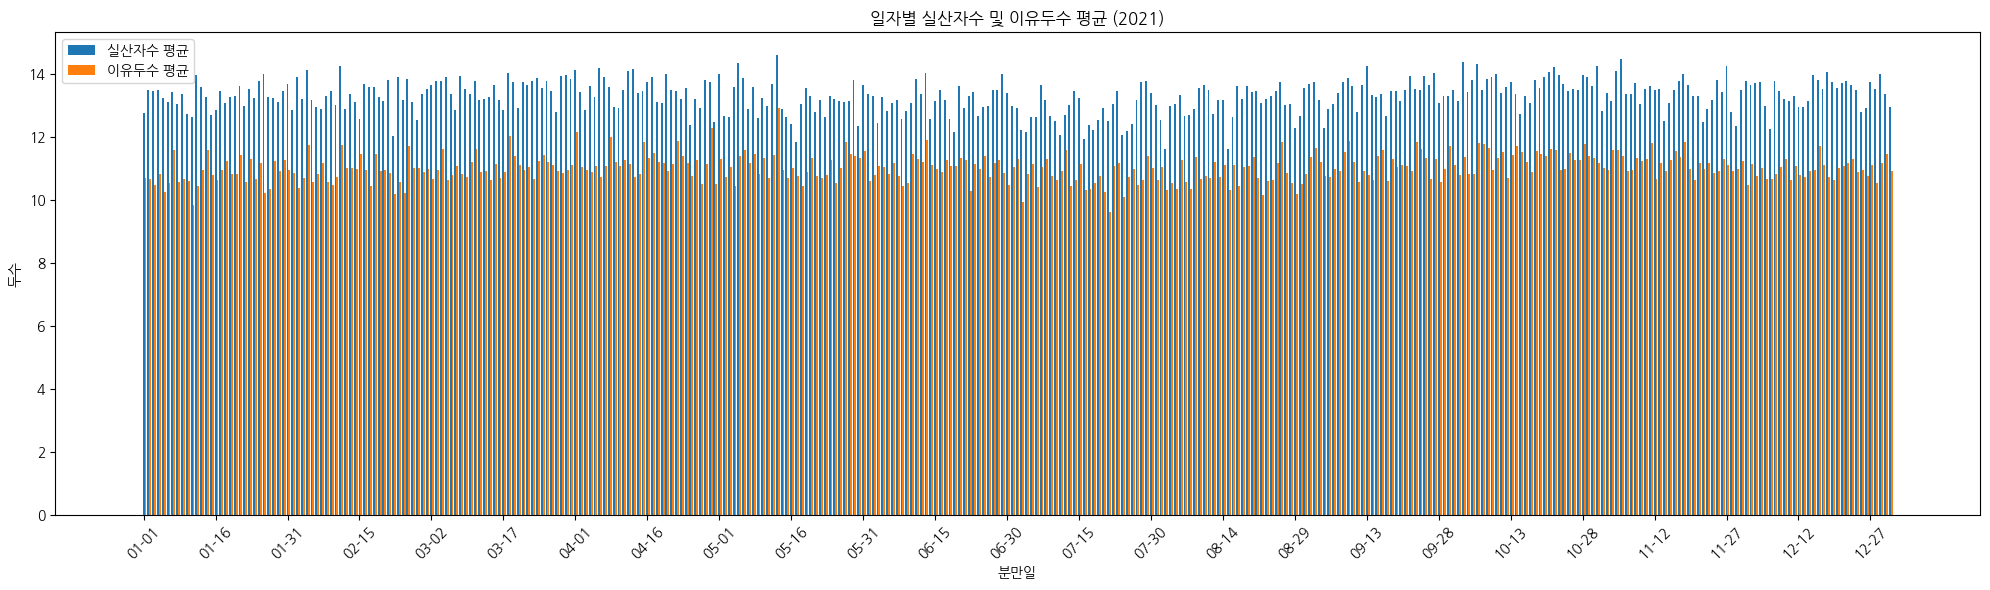

In [15]:
# 시각화: 막대그래프
plt.figure(figsize=(20, 6))
bar_width = 0.4
x = range(len(daily_avg))

plt.bar(x, daily_avg['실산자수'], width=bar_width, label='실산자수 평균')
plt.bar([i + bar_width for i in x], daily_avg['이유두수'], width=bar_width, label='이유두수 평균')

# x축 날짜 라벨 설정 (너무 많으니까 15일 단위로 표시)
plt.xticks(
    ticks=[i for i in x if i % 15 == 0],
    labels=[date.strftime('%m-%d') for i, date in enumerate(daily_avg['분만일']) if i % 15 == 0],
    rotation=45
)

plt.xlabel('분만일')
plt.ylabel('두수')
plt.title('일자별 실산자수 및 이유두수 평균 (2021)')
plt.legend()
plt.tight_layout()
plt.show()

## Scatter Graph

### Daily Graph

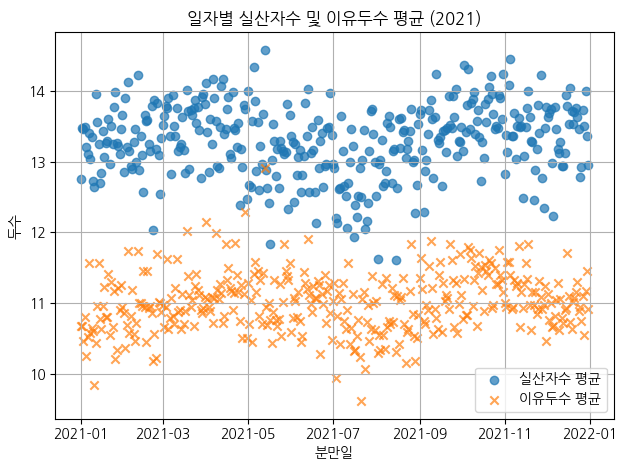

In [20]:
plt.figure()
plt.scatter(daily_avg['분만일'], daily_avg['실산자수'], label='실산자수 평균', alpha=0.7, marker='o')
plt.scatter(daily_avg['분만일'], daily_avg['이유두수'], label='이유두수 평균', alpha=0.7, marker='x')
plt.title('일자별 실산자수 및 이유두수 평균 (2021)')
plt.xlabel('분만일')
plt.ylabel('두수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('plot_image3.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### Week Graph

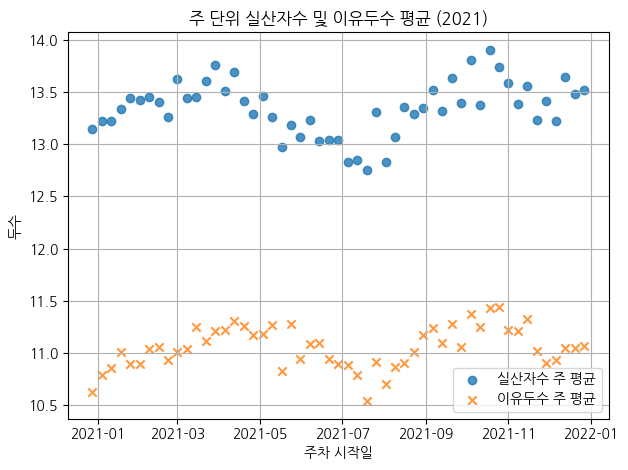

In [17]:
# 시각화
plt.figure()

plt.scatter(weekly_avg['주차'], weekly_avg['실산자수'], label='실산자수 주 평균', marker='o', alpha=0.8)
plt.scatter(weekly_avg['주차'], weekly_avg['이유두수'], label='이유두수 주 평균', marker='x', alpha=0.8)

plt.title('주 단위 실산자수 및 이유두수 평균 (2021)')
plt.xlabel('주차 시작일')
plt.ylabel('두수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 시각화로서 Scatter Graph가 최적으로 판단

## 2012~2021년 양돈 모돈 데이터 전처리

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 데이터 불러오기
file_path = "../data/combined_data.csv"
df_all = pd.read_csv(file_path, low_memory = False)

In [22]:
df_all

,농장아이디,개체 구별 번호,산차,교배지수,경과일,교배일,임신 사고기간,임신 사고 원인,임신 기간,분만일,...,사산,실산자수,생시도태두수,양자전입두수,양자전출두수,포유자돈폐사 두수,부분이유 두수,포유기간,이유일,이유두수
0,PF_0002615,560,3,1,22,20111010,NaN,NaN,116,20120203,...,0,10,NaN,NaN,NaN,NaN,NaN,27.0,20120301.0,12.0
1,PF_0002615,560,4,1,5,20120306,NaN,NaN,118,20120702,...,2,7,NaN,NaN,NaN,NaN,NaN,17.0,20120719.0,10.0
2,PF_0002615,852,1,1,5,20111227,NaN,NaN,117,20120422,...,0,12,NaN,NaN,NaN,2.0,NaN,25.0,20120517.0,10.0
3,PF_0002615,852,2,1,6,20120523,NaN,NaN,117,20120917,...,0,7,NaN,NaN,NaN,NaN,NaN,17.0,20121004.0,10.0
4,PF_0002615,1097,0,1,589,20111220,NaN,NaN,108,20120406,...,10,5,NaN,NaN,NaN,NaN,NaN,27.0,20120503.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108863,PF_0023203,65,1,1,0,20210808,NaN,NaN,115,20211201,...,0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108864,PF_0023203,66,1,1,0,20210808,NaN,NaN,115,20211201,...,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108865,PF_0023203,68,1,1,0,20210808,NaN,NaN,115,20211201,...,1,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108866,PF_0023203,77,1,1,0,20210808,NaN,NaN,115,20211201,...,0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_all = df_all[df_all['실산자수']>=df_all['이유두수']]

In [24]:
df_all.loc[:, '분만일'] = pd.to_datetime(df_all['분만일'], format='%Y%m%d', errors='coerce')

/tmp/ipykernel_26215/826815817.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['2012-04-22 00:00:00', '2012-01-28 00:00:00', '2012-01-29 00:00:00',
 '2012-04-18 00:00:00', '2012-03-17 00:00:00', '2012-08-01 00:00:00',
 '2012-03-16 00:00:00', '2012-01-10 00:00:00', '2012-01-11 00:00:00',
 '2012-06-11 00:00:00',
 ...
 '2021-10-10 00:00:00', '2021-09-07 00:00:00', '2021-09-10 00:00:00',
 '2021-09-07 00:00:00', '2021-09-15 00:00:00', '2021-09-07 00:00:00',
 '2021-07-22 00:00:00', '2021-10-27 00:00:00', '2021-11-03 00:00:00',
 '2021-11-06 00:00:00']
Length: 82471, dtype: datetime64[ns]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_all.loc[:, '분만일'] = pd.to_datetime(df_all['분만일'], format='%Y%m%d', errors='coerce')


In [25]:
# 유효한 데이터만 필터링
df_filtered_all = df_all.dropna(subset=['실산자수', '이유두수'])
# df_filtered = df_filtered[df_filtered['분만일'].notnull()]

In [26]:
# 일자별 평균 실산자수 및 이유두수 계산
daily_avg_all = df_filtered_all.groupby('분만일')[['실산자수', '이유두수']].mean().reset_index()

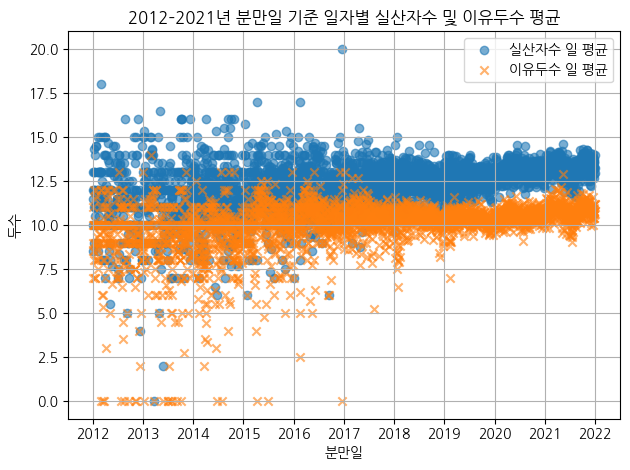

In [27]:
# 시각화
plt.figure()

plt.scatter(daily_avg_all['분만일'], daily_avg_all['실산자수'], label='실산자수 일 평균', alpha=0.6, marker='o')
plt.scatter(daily_avg_all['분만일'], daily_avg_all['이유두수'], label='이유두수 일 평균', alpha=0.6, marker='x')

plt.title('2012–2021년 분만일 기준 일자별 실산자수 및 이유두수 평균')
plt.xlabel('분만일')
plt.ylabel('두수')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

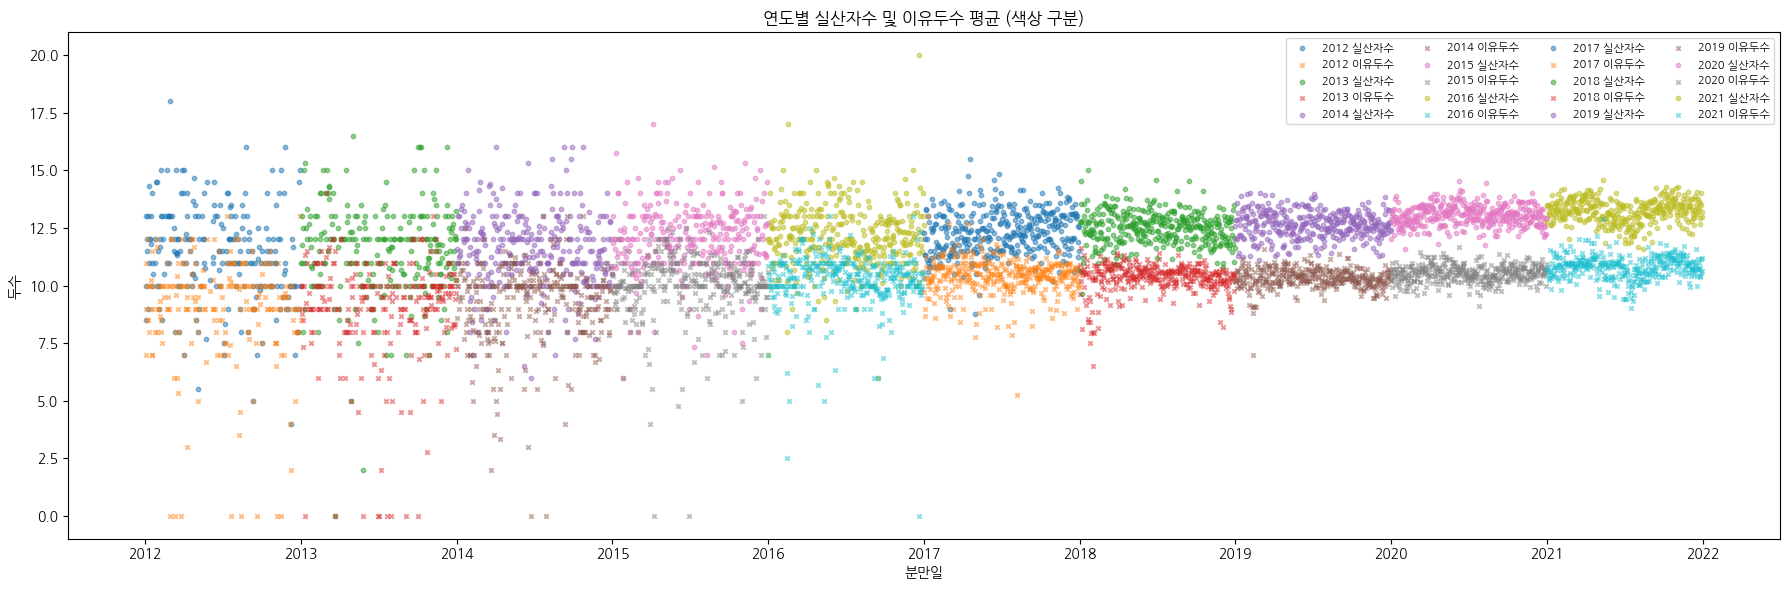

In [28]:
# 연도 컬럼 추가 (혹시 안 되어 있으면)
daily_avg_all['연도'] = daily_avg_all['분만일'].dt.year

# 시각화
plt.figure(figsize=(18, 6))

for year in sorted(daily_avg_all['연도'].unique()):
    subset = daily_avg_all[daily_avg_all['연도'] == year]
    
    # 실산자수 - 원형 마커
    plt.scatter(subset['분만일'], subset['실산자수'], alpha=0.5, s=10, label=f'{year} 실산자수', marker='o')
    
    # 이유두수 - X 마커
    plt.scatter(subset['분만일'], subset['이유두수'], alpha=0.5, s=10, label=f'{year} 이유두수', marker='x')

plt.title('연도별 실산자수 및 이유두수 평균 (색상 구분)')
plt.xlabel('분만일')
plt.ylabel('두수')
plt.legend(ncol=4, fontsize=8)
plt.tight_layout()
plt.savefig('plot_image4.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

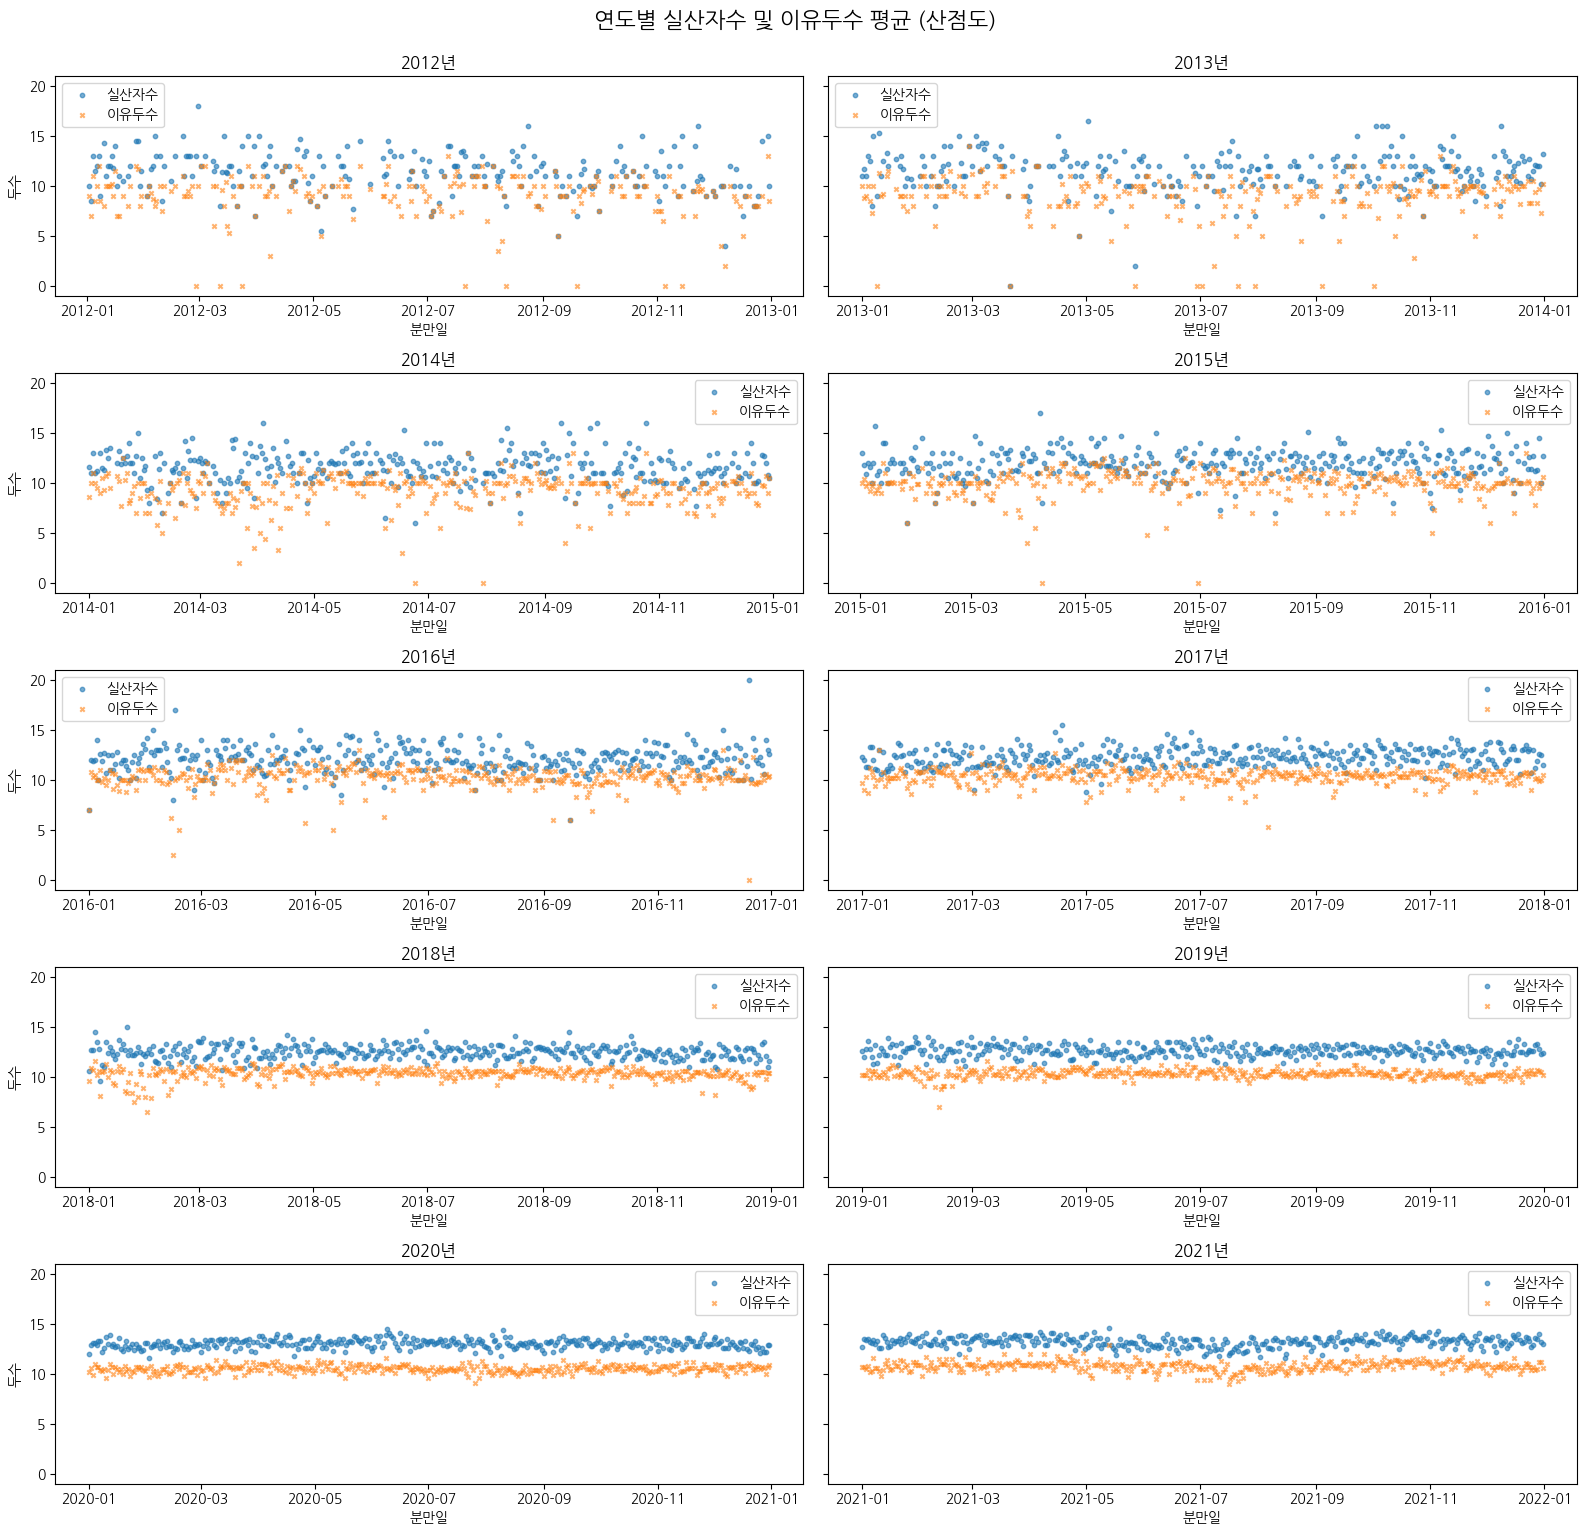

In [29]:
# 사용할 연도 리스트
years = sorted(daily_avg_all['연도'].unique())
n_years = len(years)

# subplot 레이아웃 계산 (2열 기준)
ncols = 2
nrows = (n_years + 1) // ncols  # 전체 연도 수에 맞게 행 개수 계산

# 시각화
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, nrows * 3), sharey=True)
axes = axes.flatten()  # 2차원 → 1차원 배열로 변환

for i, year in enumerate(years):
    ax = axes[i]
    subset = daily_avg_all[daily_avg_all['연도'] == year]

    ax.scatter(subset['분만일'], subset['실산자수'], label='실산자수', alpha=0.6, s=10, marker='o')
    ax.scatter(subset['분만일'], subset['이유두수'], label='이유두수', alpha=0.6, s=10, marker='x')

    ax.set_title(f'{year}년')
    ax.set_xlabel('분만일')
    if i % ncols == 0:
        ax.set_ylabel('두수')
    ax.legend()

plt.tight_layout()
plt.suptitle('연도별 실산자수 및 이유두수 평균 (산점도)', fontsize=16, y=1.02)
plt.savefig('plot_image5.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### 2022년 이전 데이터의 실산자수와 이유두수의 차이(손실률)

In [44]:
# 실산자수 대비 이유두수 손실률 계산 (%)
df_all = df_all[df_all['실산자수'] > 0]  # 0으로 나누는 거 방지
df_all['손실률(%)'] = ((df_all['실산자수'] - df_all['이유두수']) / df_all['실산자수']) * 100

# 결과 미리보기
df_all[['분만일', '실산자수', '이유두수', '손실률(%)']].head()

,분만일,실산자수,이유두수,손실률(%)
2,2012-04-22,12,10.0,16.666667
7,2012-01-28,11,9.0,18.181818
8,2012-01-29,10,8.0,20.000000
10,2012-04-18,11,9.0,18.181818
12,2012-03-17,11,0.0,100.000000


In [ ]:
# 필요한 경우, 합친 데이터를 CSV 파일로 저장할 수 있습니다.
df_all.to_csv("../data/prophet_data.csv", index=False)